3.0273037941713055 4.231124880724682


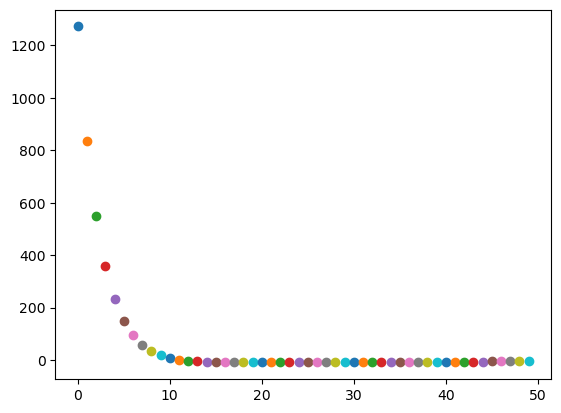

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Use the GD script to find the line of of best fit for one of the fuel files https://clarksonmsda.org/datafiles/fuel/

# I have loaded gas7.csv version of the dataset for this assignmnet demonstration. 


#D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
#D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c

#dataset upload
fn = '../data/gas7.csv'
df = pd.read_csv(fn)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

X = df['vehicle_tons']
Y = df['gas_pumped']
m = 0
c = 0
n = len(X)
L = 0.1
e = 50
line_history = []
for i in range(e):
    Y_pred = m*X + c
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m-L*D_m
    c = c-L*D_c
    plt.scatter(i,sum(X * (Y - Y_pred)))
    line_history.append([m,c,sum(X * (Y - Y_pred))])

print(m,c)
#print(line_history)
#Following script will show the sum of square residuals per epoch. 
#Plot the loss (sum of squared residuals)
plt.show()


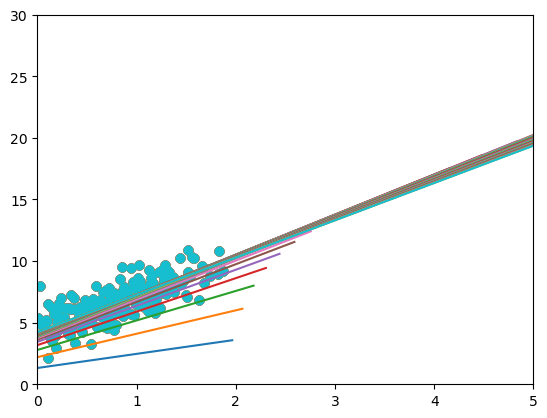

In [26]:
for line in line_history:
    plt.scatter(X,Y)
    m,c,loss = line
    abline(m,c)
plt.xlim(0,5)
plt.ylim(0,30)
plt.show()


1272.1992015800297


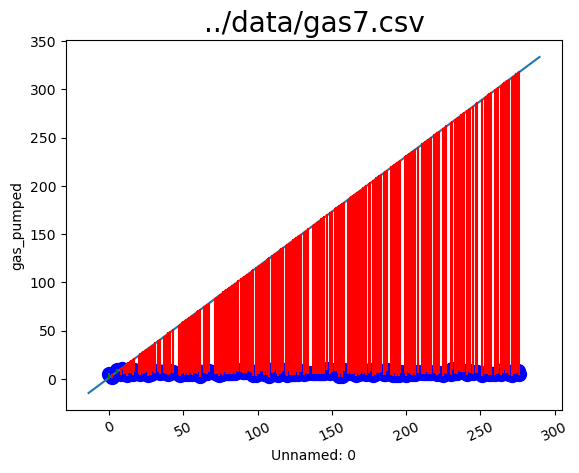

837.1475131008094


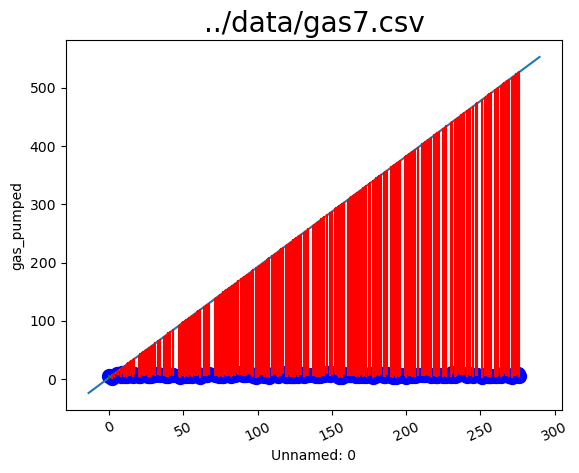

549.3717522896301


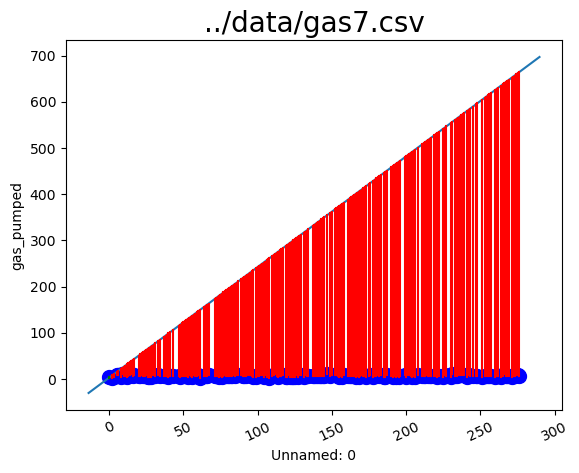

359.04956591218377


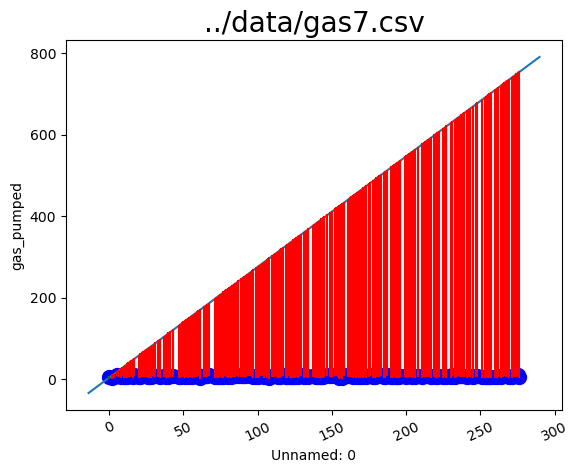

233.21234201328997


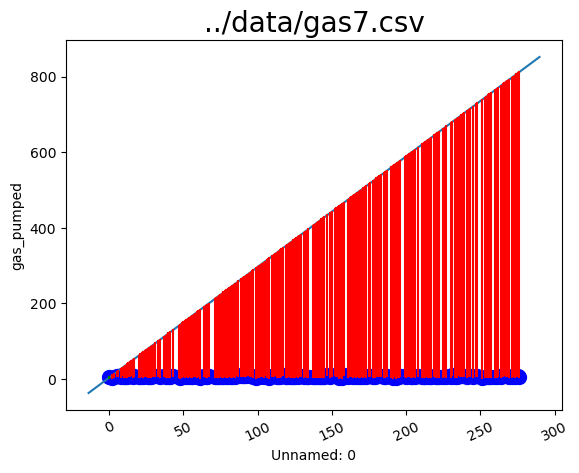

150.04400020339028


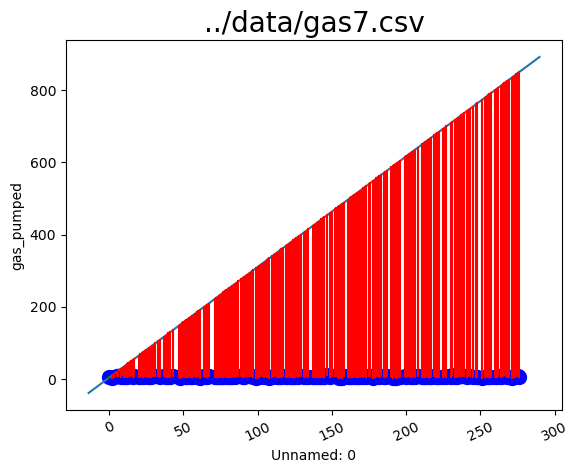

95.10836175038187


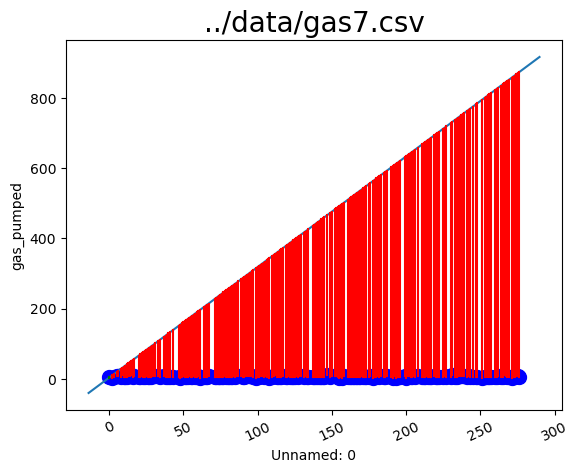

58.85270810779468


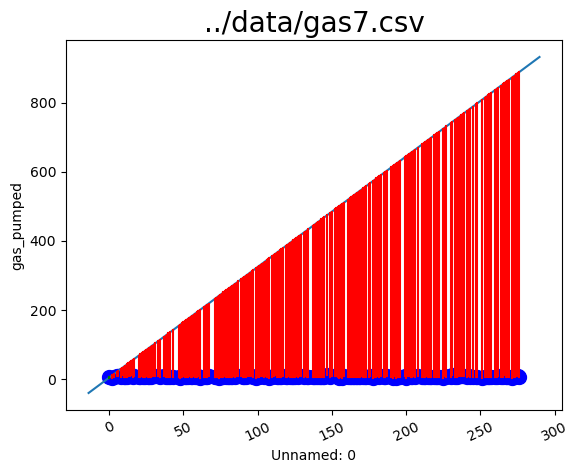

34.95582455068279


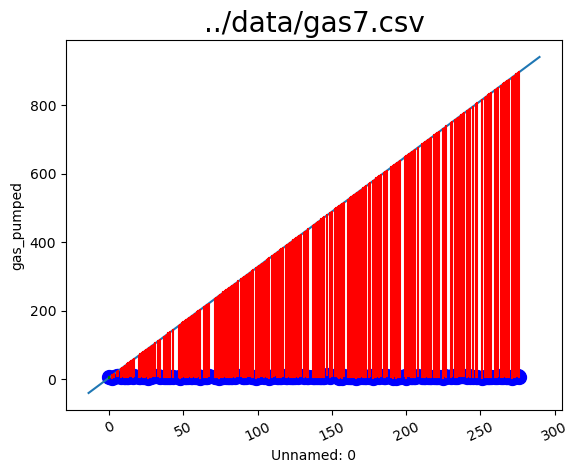

19.234860265695097


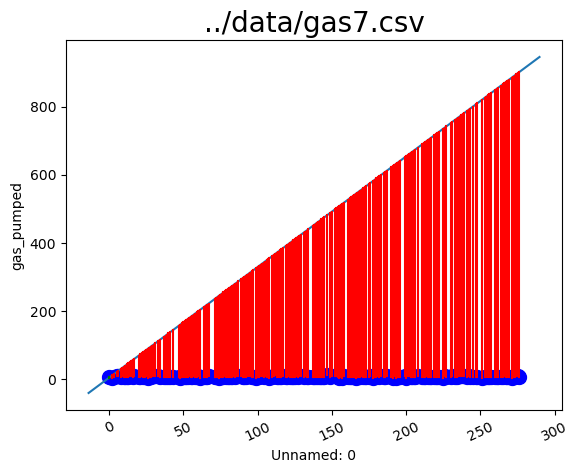

8.921970958833159


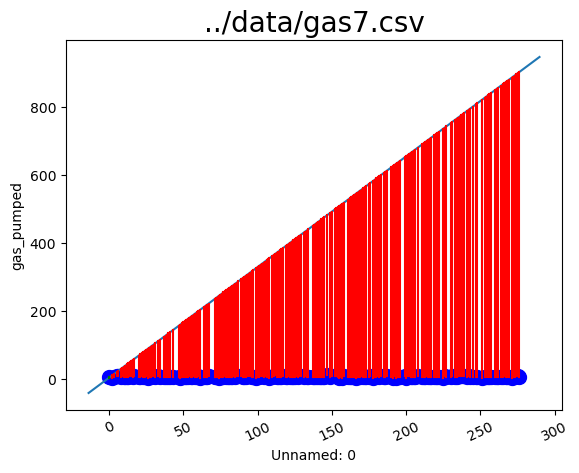

2.185655600699221


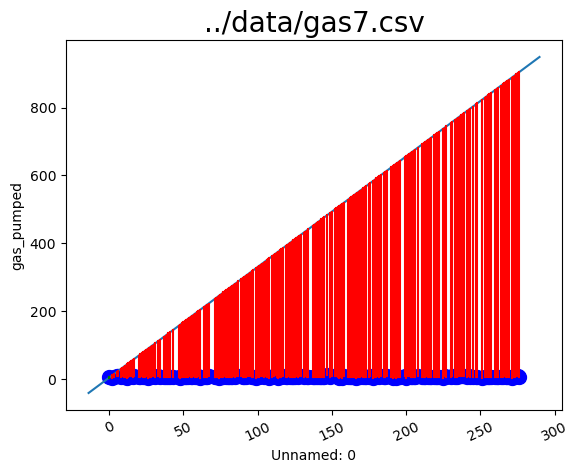

-2.1859867320337827


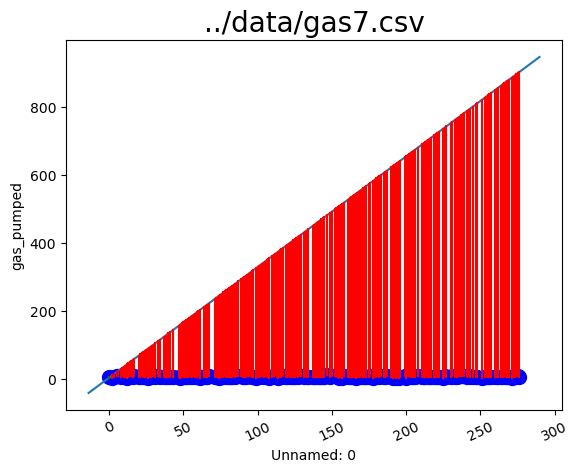

-4.994853526965668


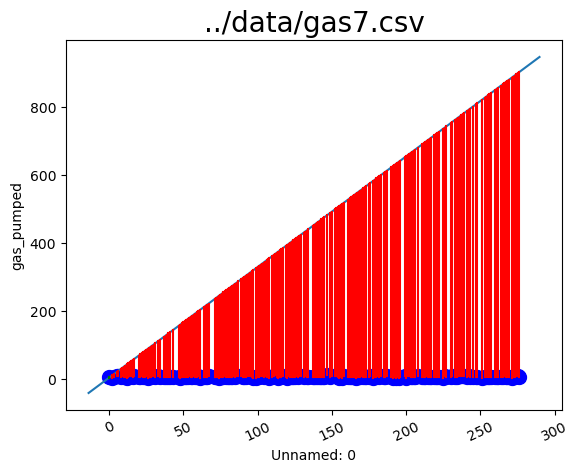

-6.771534054507477


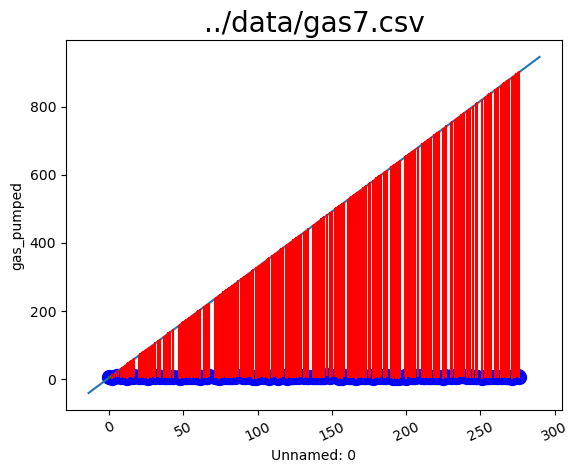

-7.867087361852418


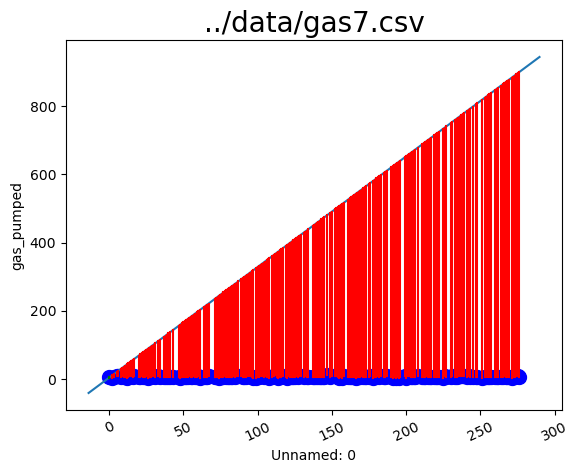

-8.51377399227205


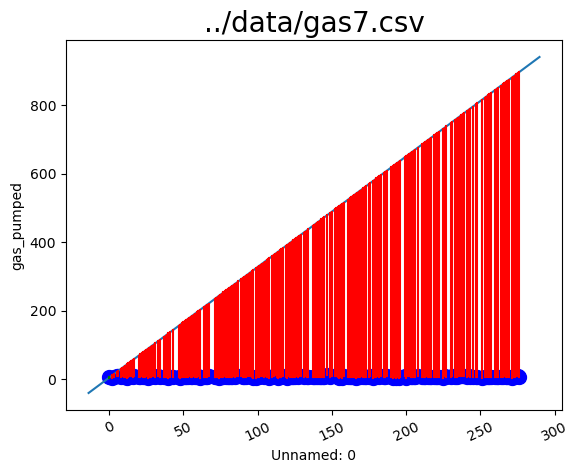

-8.865243625523867


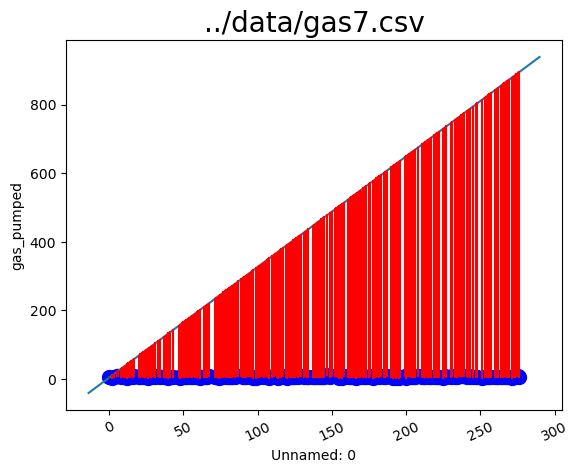

-9.023128199231785


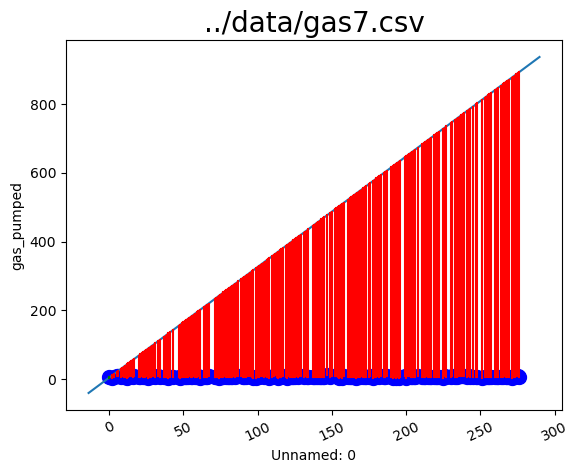

-9.054639204998184


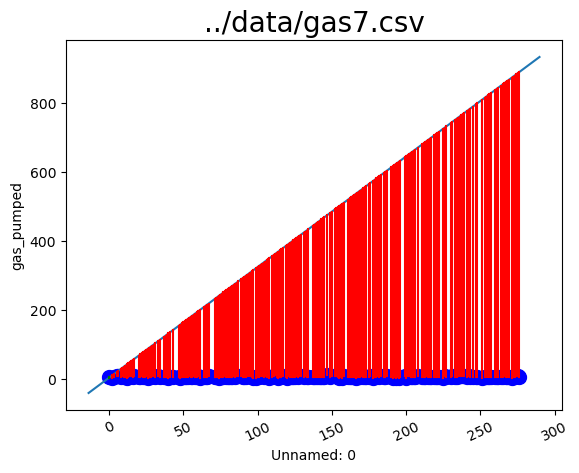

-9.004212227393975


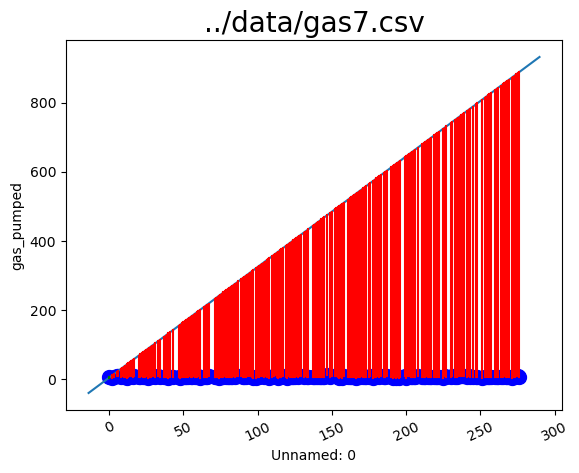

-8.901212398451538


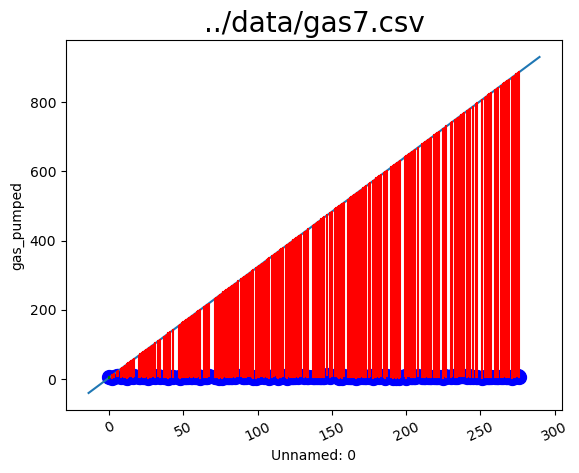

-8.765033264087835


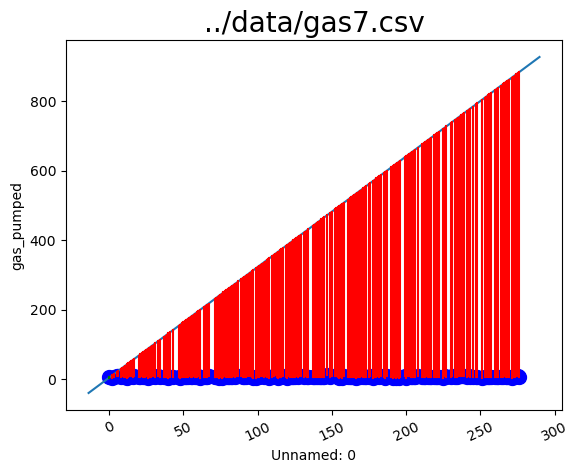

-8.60847080792713


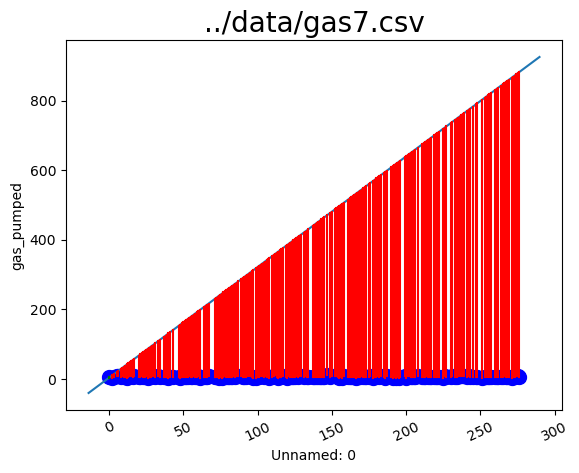

-8.439956105060155


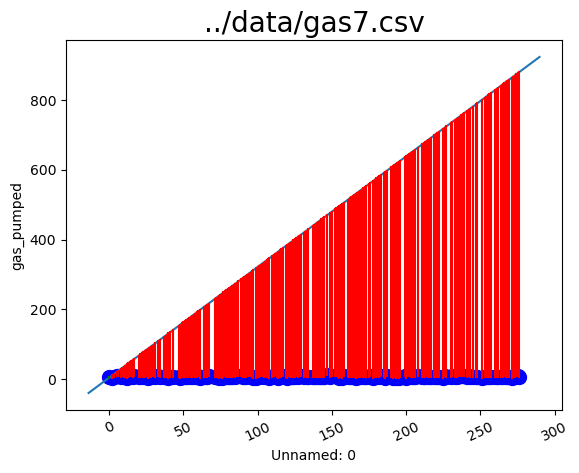

-8.265032703781262


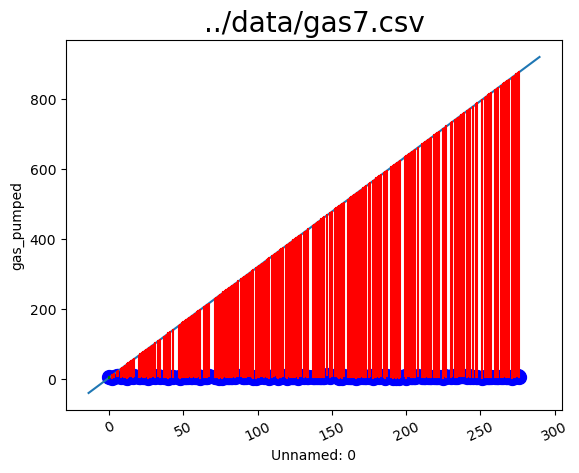

-8.087334225811869


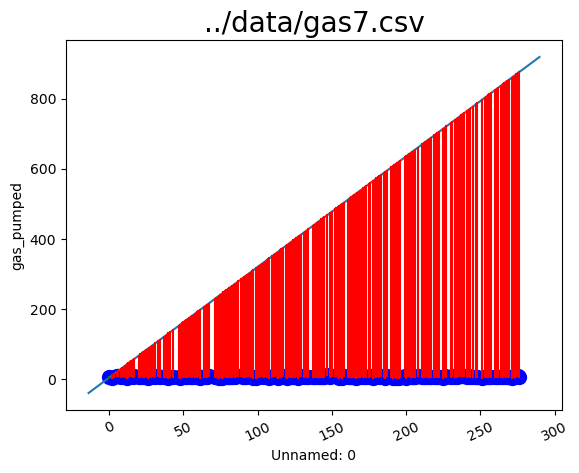

-7.909231249317277


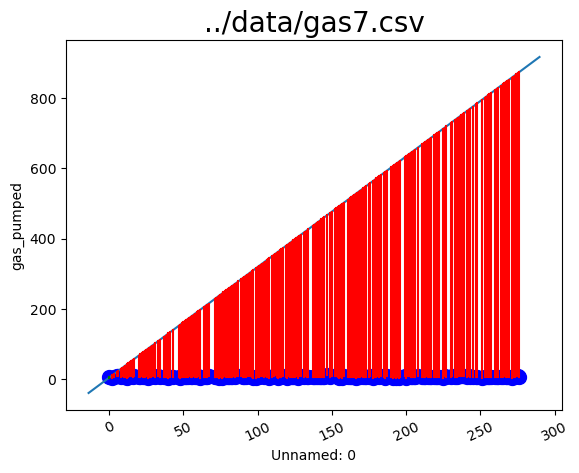

-7.732259348696269


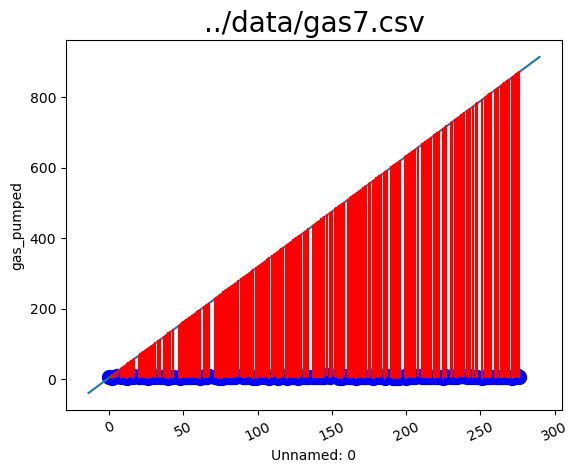

-7.557402320882812


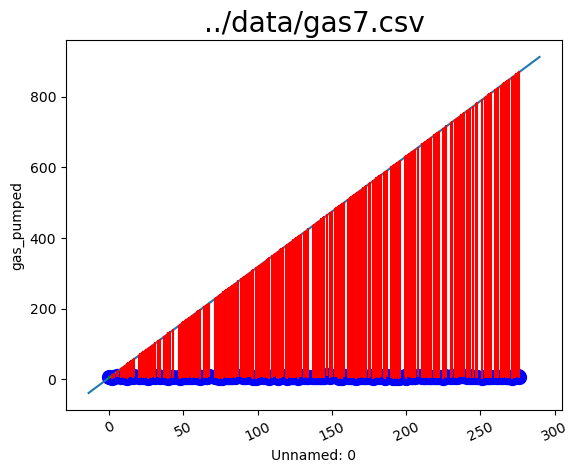

-7.385279585436621


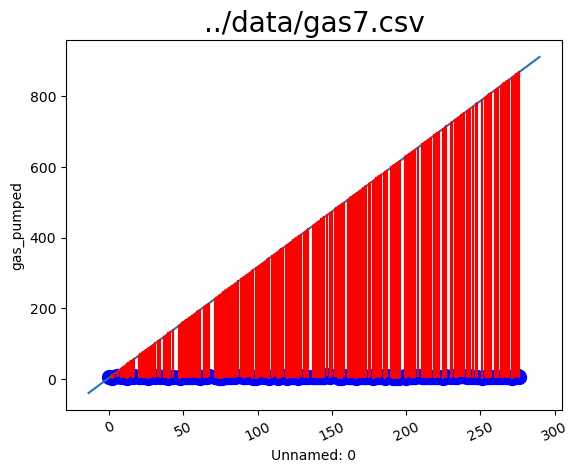

-7.216270174495774


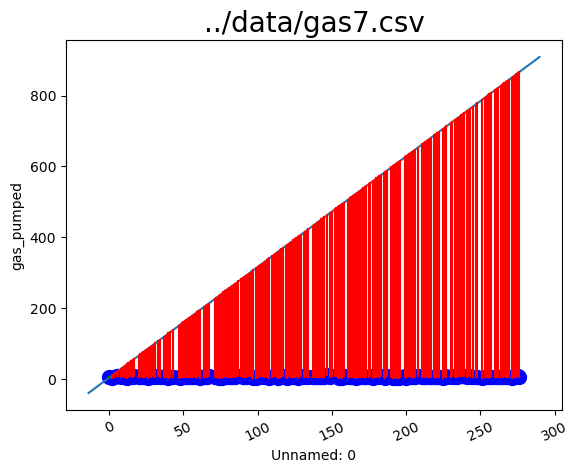

-7.050594763088613


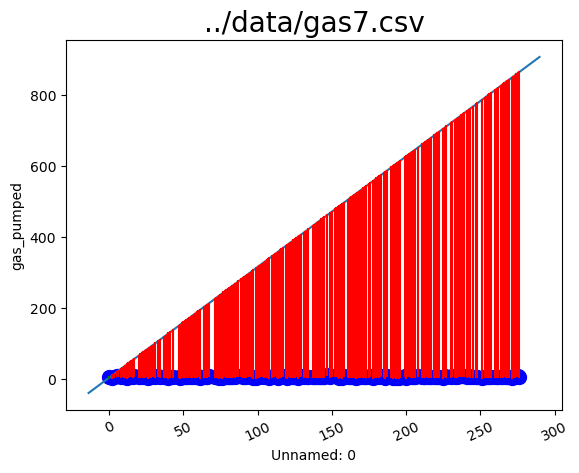

-6.88836993411417


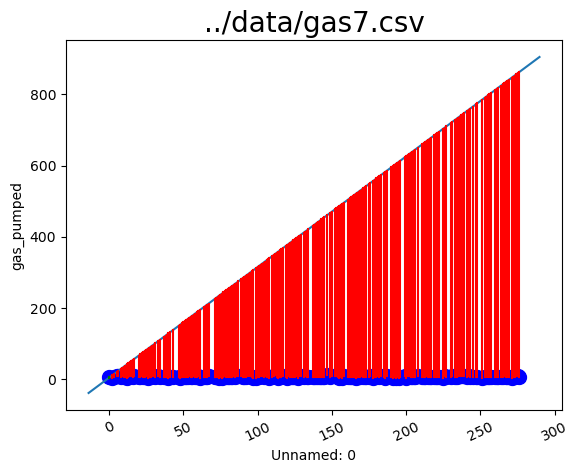

-6.729644070706575


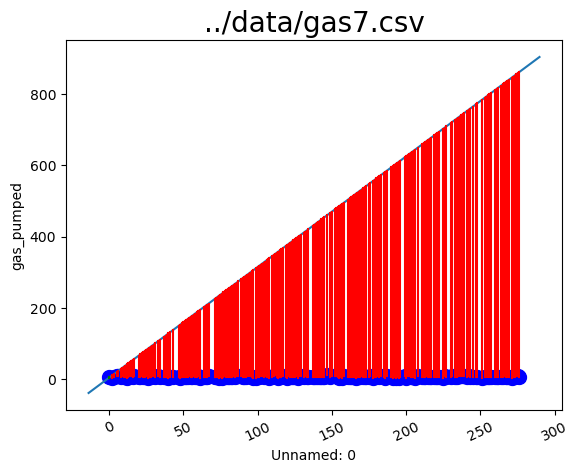

-6.574421091358619


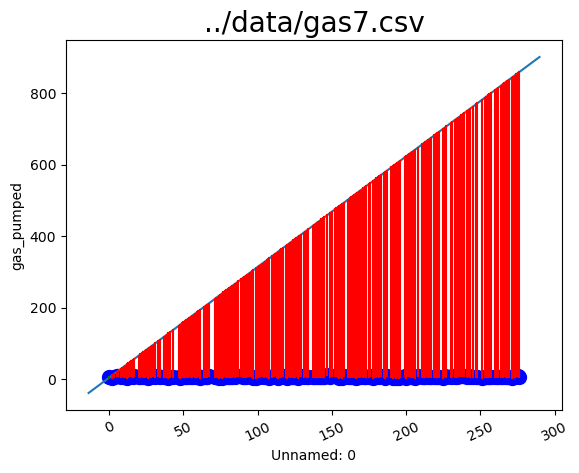

-6.422676140669365


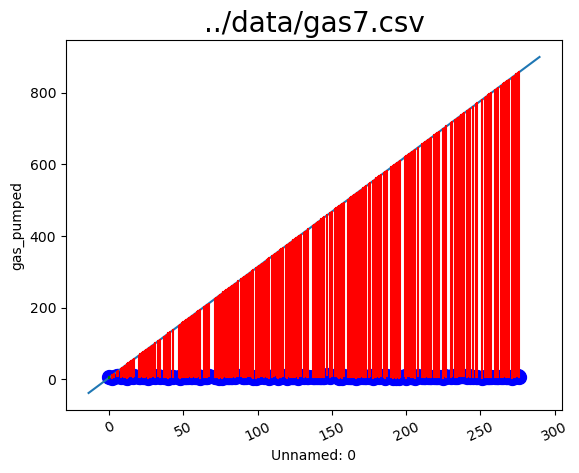

-6.274365957283332


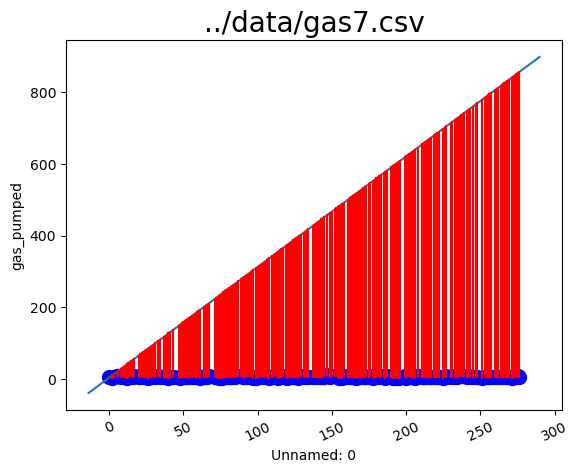

-6.1294357199452785


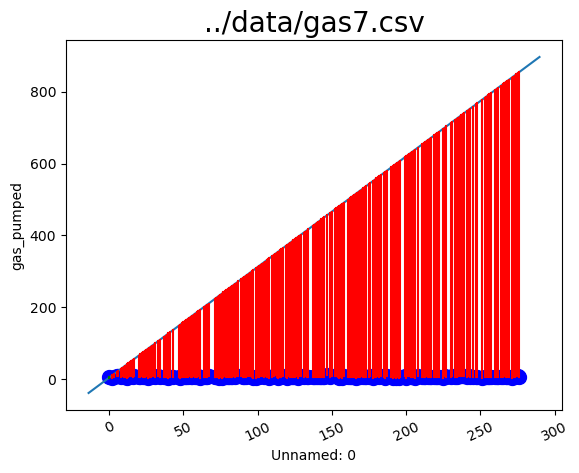

-5.9878235633779795


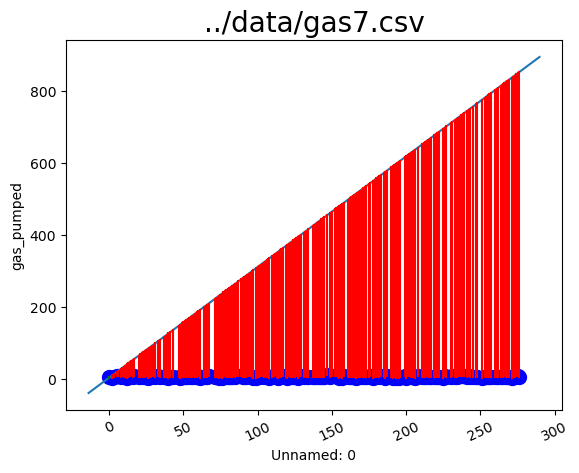

-5.8494635525535905


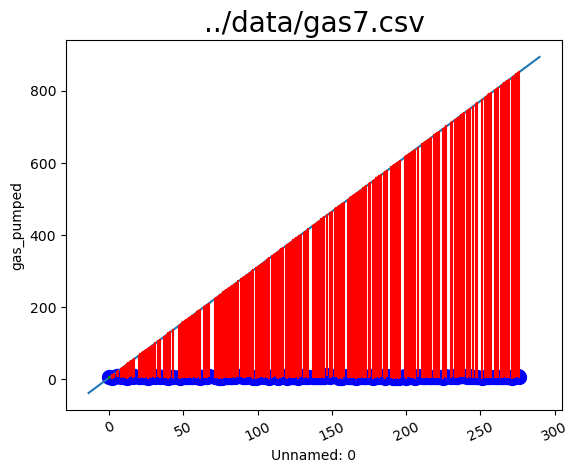

-5.714287637171925


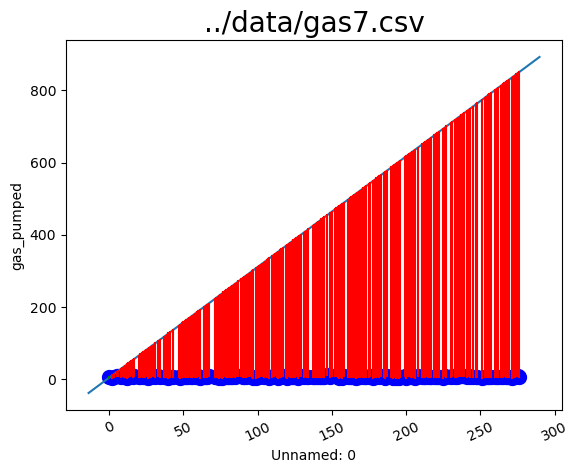

-5.582226931631193


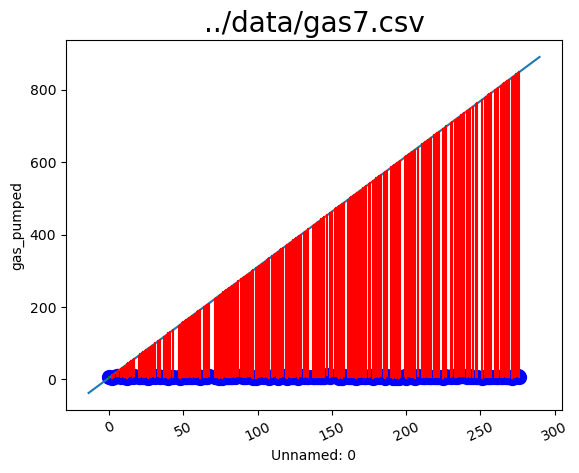

-5.453212548970909


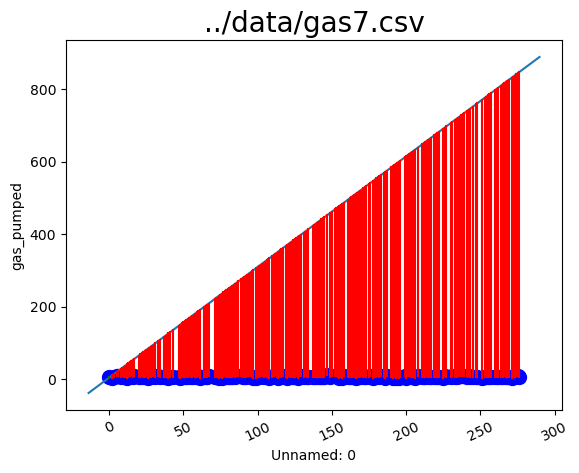

-5.327176139967021


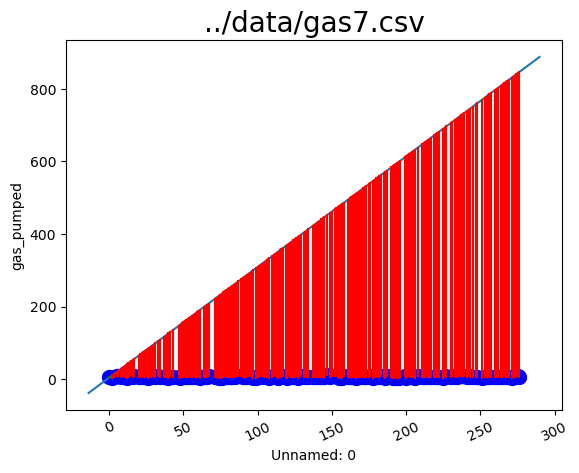

-5.204050237414263


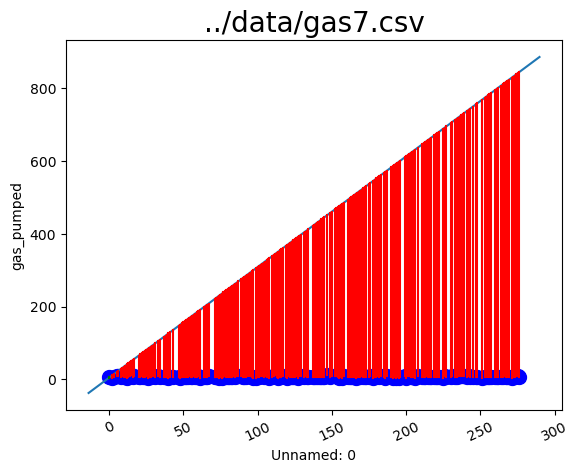

-5.083768471785043


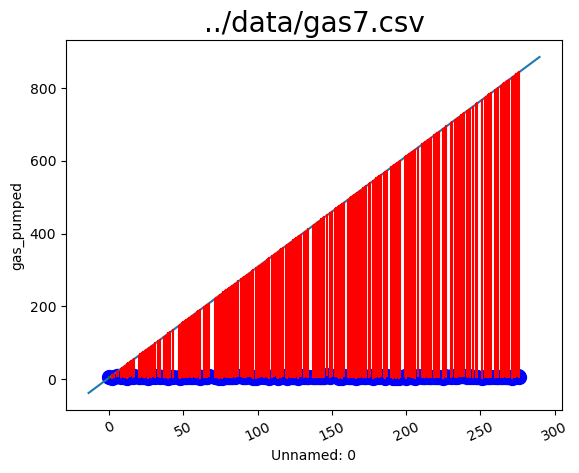

-4.96626570205414


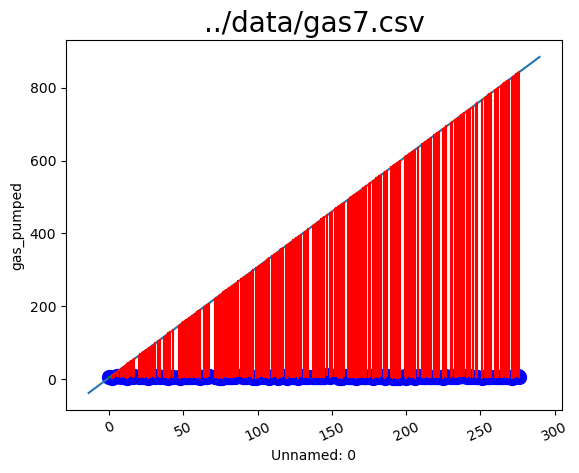

-4.851478090663301


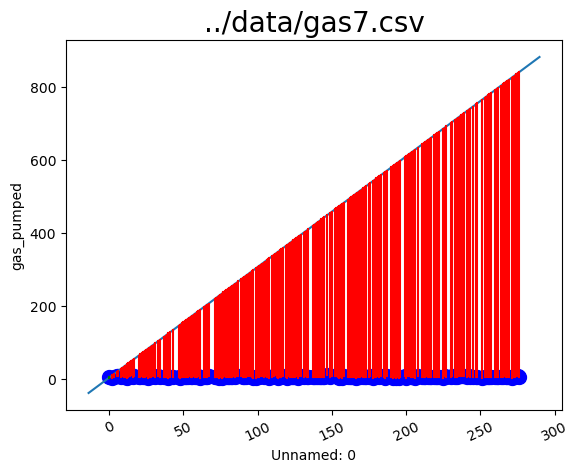

-4.739343141787621


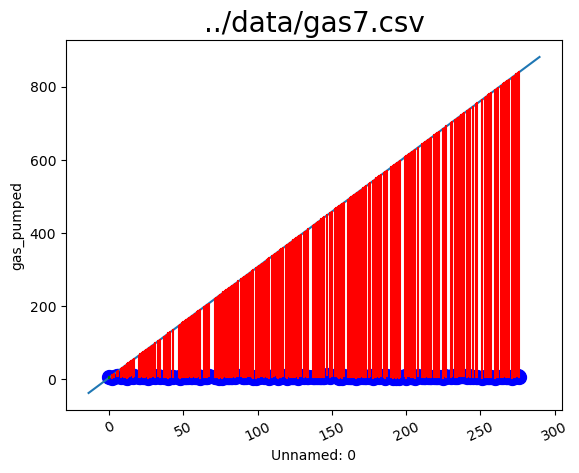

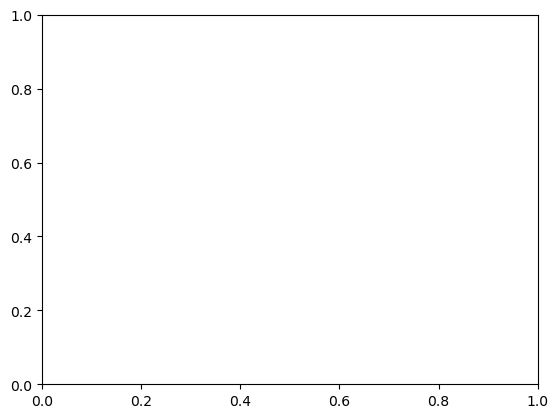

In [27]:

#plot the line and points


for line in line_history:
    plt.scatter(df[df.columns[0]],df[df.columns[1]], color = 'b',s = 100)
    plt.xticks(rotation = 25)
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.title(fn, fontsize = 20)
    m,c,loss = line
    abline(m,c)
    for index, row in df.iterrows():
        #print(row[0],row[1],row[0],m*row[0] + c)
        y2 = (m*row[0] + c)
        if y2 > row[1]:
            color = 'red'
        else:
            color = 'green'
       
        plt.plot([row[0],row[0]],[row[1],y2],color=color)# Draw the loss distances format=[x1,x2],[y1,y2]
    print(loss)
    plt.show()
    plt.cla()


#What is the 'best' learning rate?
#The best learning rate the I found was 0.1, for the purpose of demonstration i have increase the number of epochs
#as we are working the small number of sampled dataset which will not much effect the computational resources. 